## Steps & Tasks:

### 1. Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm 

In [11]:
import numpy as np   
from sklearn.linear_model import LinearRegression
from sklearn import svm
import pandas as pd    
import matplotlib.pyplot as plt 
from sklearn.model_selection  import train_test_split
%matplotlib inline 
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
vehData = pd.read_csv("vehicle.csv")  
vehData.shape

(846, 19)

In [3]:

vehData.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
vehData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [5]:
X = vehData.drop('class',axis=1)     
Y = vehData['class'] 


In [6]:
X = X.replace('?', np.nan)

In [7]:
#instead of dropping the rows, lets replace the missing values with median value. 
X.median()

compactness                     93.0
circularity                     44.0
distance_circularity            80.0
radius_ratio                   167.0
pr.axis_aspect_ratio            61.0
max.length_aspect_ratio          8.0
scatter_ratio                  157.0
elongatedness                   43.0
pr.axis_rectangularity          20.0
max.length_rectangularity      146.0
scaled_variance                179.0
scaled_variance.1              363.5
scaled_radius_of_gyration      173.5
scaled_radius_of_gyration.1     71.5
skewness_about                   6.0
skewness_about.1                11.0
skewness_about.2               188.0
hollows_ratio                  197.0
dtype: float64

In [8]:
# replace the missing values with median value.
# Note, we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)

medianFiller = lambda x: x.fillna(x.median())
X = X.apply(medianFiller,axis=0)


### 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

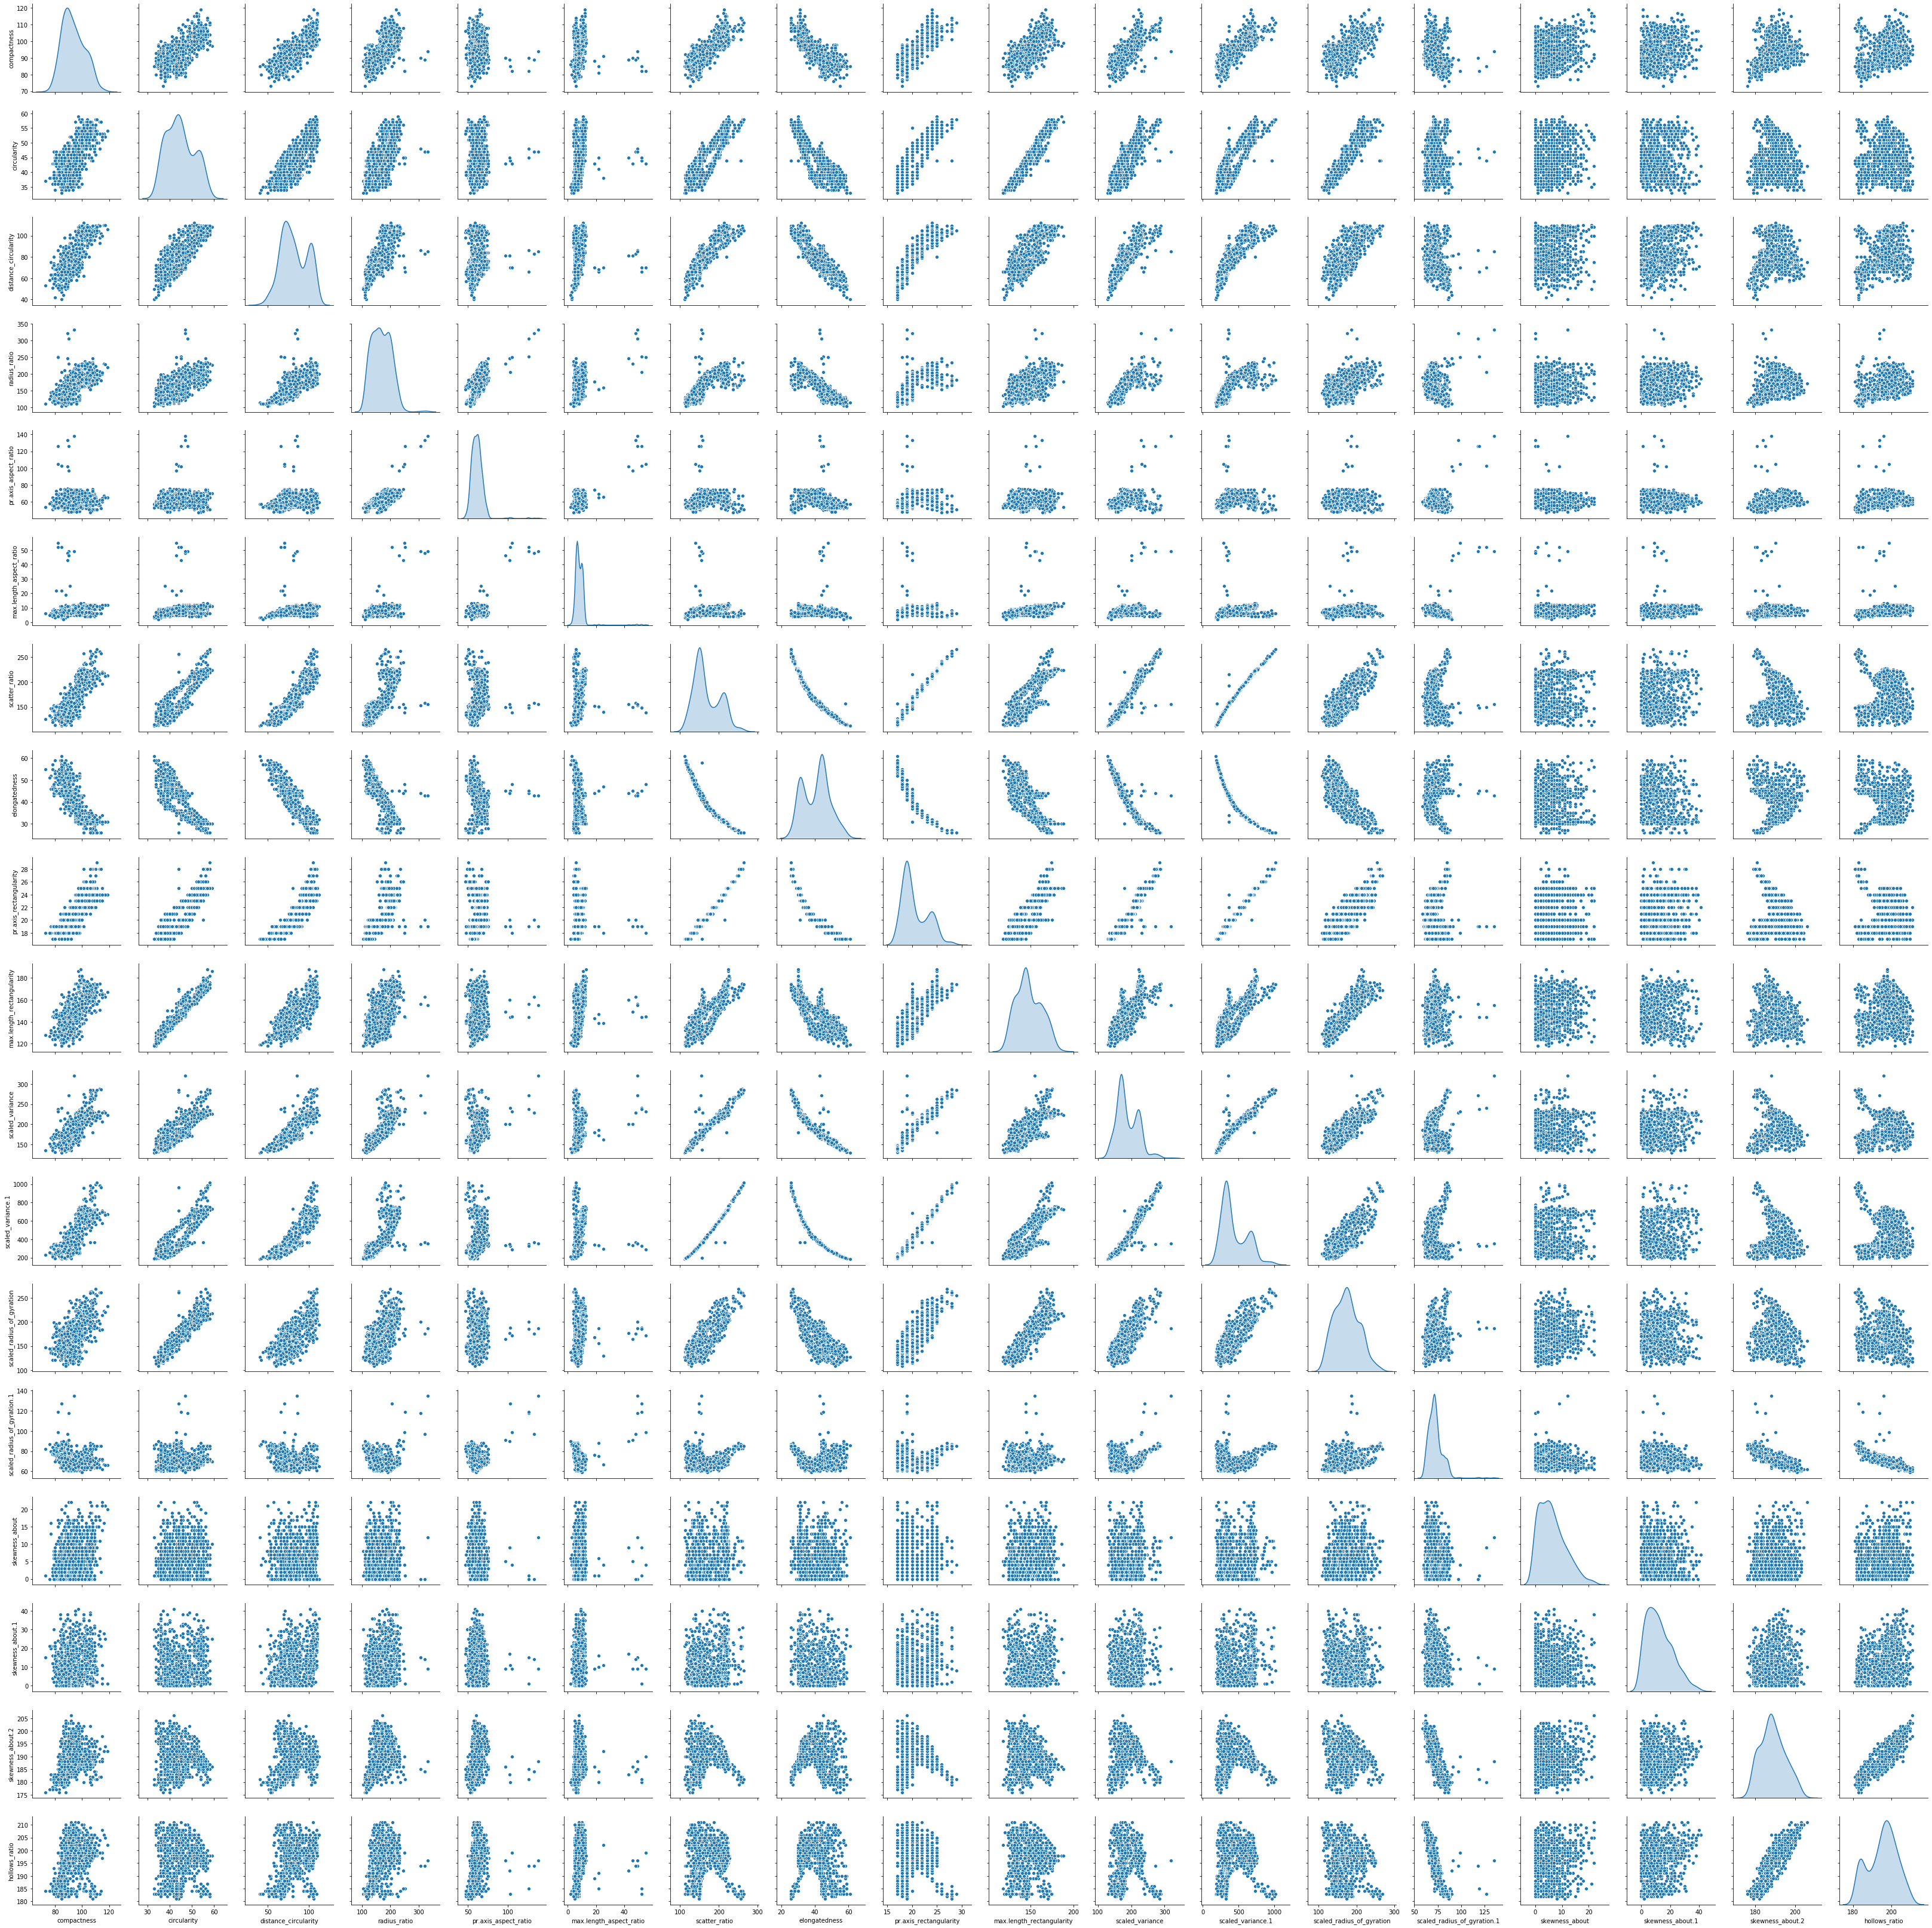

In [9]:
sns.pairplot(X, diag_kind='kde') 

* compactness has positive relation with circularity, distance_circularity, scatter_ratio, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1 
* whereas elongatedness has negative correlation with several variables.
* Variables such as radius_ratio, pr.axis_aspect_ratio, max.Length_io, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio does not much correlation with majority of other variables and can be avoided as they do not give much meaning to the data.

### 3. Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn)

In [12]:

#X = vehData.drop('class',axis=1)     # Predictor feature columns (8 X m)
#Y = vehData['class']   # Predicted class (no=True, yes=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head(20)

compactness  circularity  distance_circularity  radius_ratio  \
350           97         46.0                 101.0         210.0   
40            95         48.0                 104.0         214.0   
89            80         37.0                  57.0         116.0   
427           86         38.0                  89.0         176.0   
353           81         47.0                  69.0         146.0   
68            86         44.0                  78.0         164.0   
309          109         48.0                 107.0         215.0   
139           91         42.0                  80.0         162.0   
565          101         48.0                  85.0         191.0   
118           85         44.0                  80.0         128.0   
498           88         36.0                  53.0         113.0   
782           87         44.0                  98.0         211.0   
570          105         53.0                 108.0         206.0   
305           86         45.0                  73.0         152.0   
789           90         39.0                  85.0         160.0   
529           86         43.0                  61.0         119.0   
14            94         49.0                  79.0         203.0   
82            94         36.0                  68.0         127.0   
590           84         44.0                  65.0         128.0   
355           93         42.0                  88.0         188.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
350                  66.0                        8          192.0   
40                   67.0                        9          205.0   
89                   55.0                        6          125.0   
427                  59.0                        9          169.0   
353                  64.0                        6          151.0   
68                   68.0                        9          142.0   
309                  62.0                       10          205.0   
139                  66.0                        8          148.0   
565                  60.0                       11          175.0   
118                  56.0                        8          150.0   
498                  57.0                        3          118.0   
782                  70.0                       10          189.0   
570                  63.0                       12          222.0   
305                  63.0                        6          149.0   
789                  59.0                        7          163.0   
529                  53.0                        8          150.0   
14                   71.0                        5          174.0   
82                   54.0                        7          127.0   
590                  55.0                        8          150.0   
355                  62.0                       10          183.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
350           35.0                    22.0                        151   
40            32.0                    23.0                        151   
89            54.0                    18.0                        125   
427           39.0                    20.0                        132   
353           44.0                    19.0                        147   
68            46.0                    18.0                        147   
309           32.0                    23.0                        158   
139           44.0                    19.0                        145   
565           38.0                    21.0                        153   
118           46.0                    19.0                        144   
498           57.0                    17.0                        128   
782           35.0                    22.0                        141   
570           31.0                    25.0                        168   
305           44.0                    19.0                        145   
789       

In [13]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(X.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(X.index)) * 100))

69.98% data is in training set
30.02% data is in test set


In [14]:
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x]== predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

### 4. Train a Support vector machine using the train set and get the accuracy on the test set

In [15]:
from sklearn import svm
clf = svm.SVC(gamma=0.025, C=3) 

In [16]:
clf.fit(x_train , y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
y_pred = clf.predict(x_test)

In [18]:
y_test,y_pred = np.array(y_test),np.array(y_pred)

In [19]:
getAccuracy(y_test , y_pred)

53.54330708661418

* The Accuracy of the SVM model is 53.5%

### 5. Perform K-fold cross validation and get the cross validation score of the model 

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
clf = svm.SVC(kernel='linear', C=1)

In [23]:
scores = cross_val_score(clf, X, Y, cv=5)

In [24]:
scores

array([0.91764706, 0.93529412, 0.95882353, 0.95266272, 0.94610778])

In [25]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.94 (+/- 0.03)


* After K-fold Cross validation, accuracy is over 0.94

### 6. Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data

In [26]:
from scipy.stats import zscore
vehDataScaled=X.apply(zscore)
vehDataScaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
4              5.245643                 9.444962      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   
2         1.097671           1.109379                   1.392477   
3        -0.912419          -0.738777                  -1.466683   
4         1.671982          -0.648070                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   
2                     0.074587        1.558727         -0.403383   
3                    -1.265121       -0.073812         -0.291347   
4                     7.309005        0.538390         -0.179311   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

In [27]:
covMatrix = np.cov(vehDataScaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.10385472 -0.18325156  0.07969

In [28]:
pca = PCA(n_components=6)
pca.fit(vehDataScaled)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [29]:
print(pca.explained_variance_)

[9.40460261 3.01492206 1.90352502 1.17993747 0.91726063 0.53999263]


In [30]:
print(pca.components_)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592035e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053416e-02
   3.27257120e-02  3.14147276e-02 -9.

In [31]:
print(pca.explained_variance_ratio_)

[0.52186034 0.16729768 0.10562639 0.0654746  0.05089869 0.02996413]


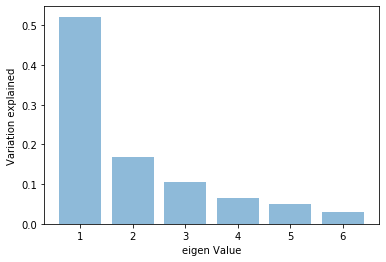

In [32]:
plt.bar(list(range(1,7)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

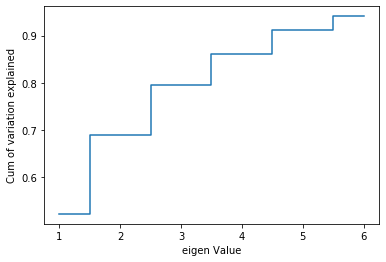

In [33]:
plt.step(list(range(1,7)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

#### Dimensionality Reduction

Now 5 dimensions seems very reasonable. With 5 variables we can explain over 95% of the variation in the original data!

### 7. Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier. 

In [34]:
pca3 = PCA(n_components=5)
pca3.fit(vehDataScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(vehDataScaled)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074210e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641988e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843560e-02  1.87337407e-01 -7.12008428e-02 -4.26053406e-02
   3.27257115e-02  3.14147276e-02 -9.

In [35]:
Xpca3

array([[ 3.34162030e-01, -2.19026358e-01,  1.00158417e+00,
         1.76612370e-01,  7.93007068e-02],
       [-1.59171085e+00, -4.20602982e-01, -3.69033854e-01,
         2.33234117e-01,  6.93948581e-01],
       [ 3.76932418e+00,  1.95282752e-01,  8.78587404e-02,
         1.20221219e+00,  7.31732266e-01],
       ...,
       [ 4.80917387e+00, -1.24931049e-03,  5.32333105e-01,
         2.95652324e-01, -1.34423635e+00],
       [-3.29409242e+00, -1.00827615e+00, -3.57003198e-01,
        -1.93367514e+00,  4.27680054e-02],
       [-4.76505347e+00,  3.34899728e-01, -5.68136078e-01,
        -1.22480708e+00, -5.40510353e-02]])

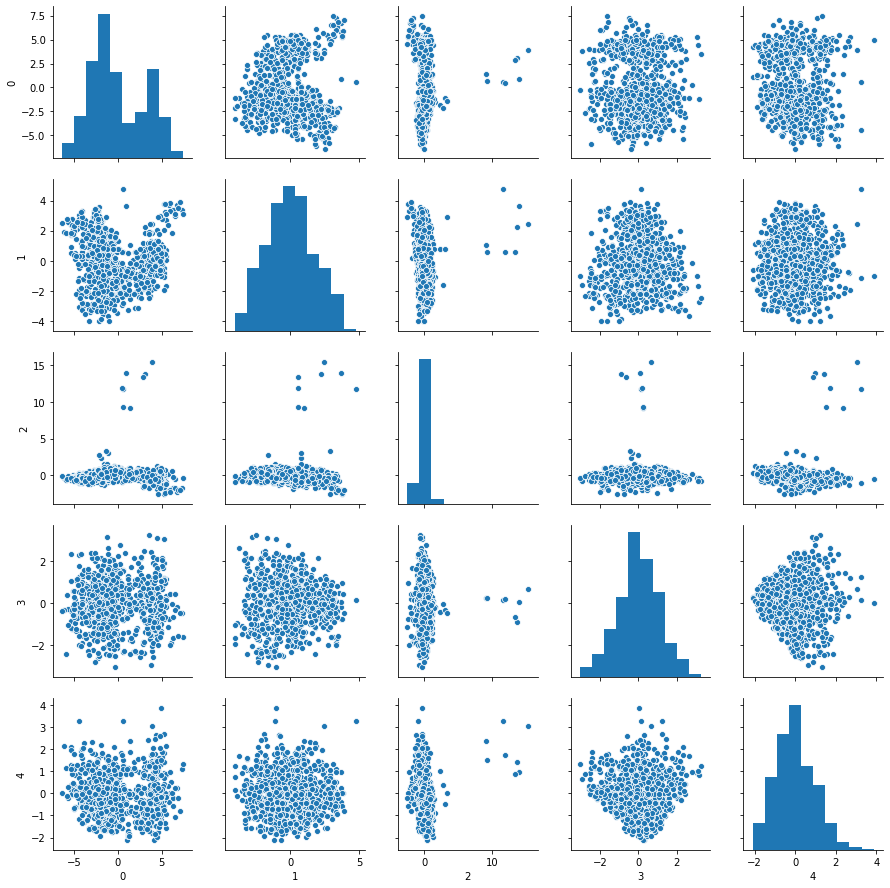

In [36]:
sns.pairplot(pd.DataFrame(Xpca3))


In [38]:
regression_model_pca = svm.SVC(gamma=0.025, C=3)  
regression_model_pca.fit(Xpca3, Y)
regression_model_pca.score(Xpca3, Y)

0.7789598108747045

* Accuracy with PCA components used is 78%

In [39]:
scores = cross_val_score(clf, Xpca3, Y, cv=5)

In [40]:
scores

array([0.64705882, 0.67058824, 0.69411765, 0.71005917, 0.62874251])

In [41]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.67 (+/- 0.06)


* After K-fold cross validation, we see 0.67 accuracy 

### 8. Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings 

**Accuracy of SVM model - 53.5% & cross validation score - 0.94 accuracy

**Accuracy of SVM using PCA components - 78% & cross validation score - 0.67 accuracy

#### Based on the scores above, we can say the model with PCA Components have performed better as we could reduce the dimensions however the accuracy with respect of Cross-validation is about 0.67. 